
# Project: Investigate a Dataset - [No show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.

‘Neighborhood’ indicates the location of the hospital.

‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


#### DATASET

#### Data Dictionary

01 - PatientId : Identification of a patient

02 - AppointmentID : Identification of each appointment

03 - Gender : Male or Female . 

04 - ScheduledDay : The day of the actual appointment, when they have to visit the doctor.

05 - AppointmentDay : The day a patient is supposed to go to see the doctor.

06 - Age : How old is the patient.

07 - Neighbourhood : Where the appointment takes place.

08 - Scholarship : True of False . This indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família

09 - Hipertension : True or False

10 - Diabetes : True or False

11 - Alcoholism : True or False

12 - Handcap : True or False

13 - SMS_received : 1 or more messages sent to the patient.

14 - No-show : True or False.

There are 13 Independent Variables -> ['PatientId' 'AppointmentID' 'Gender' 'ScheduledDay' 'AppointmentDay' 'Age' 'Neighbourhood' 'Scholarship' 'Hypertension' 'Diabetes' 'Alcoholism' 'Handicap' 'SMSReceived']

The Dependent Variable is -> ['NoShow']

### Question(s) for Analysis

  1) What is the Propotion of show-up vs No-show-up?

  2) What is the proportion of ShowUp vs No ShowUp by Gender
  
  3) What is the (%) of the Top Ten Neighbourhood with the highest appointment? 
  
  4) How was the attendance rate for each day?
  
  5) What day of the week has the highest and lowest show-up and No-Show?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# checking for missing values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
# checking for duplicated values
df.duplicated().sum()

0

In [9]:
df.shape

(110527, 14)

# The above shows there is no missing or duplicated value in the dataset and it has 110527 rows and 14 columns


### Data Cleaning


In [10]:
# Renaming the column headers that were not properly spelt o

df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')


In [11]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
# Droping those columns that are not important for the analysis
df.drop(['PatientId', 'AppointmentID', ], axis=1, inplace=True)

In [13]:
# Converting the appointmentday and scheduleday data type from object to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [14]:
# Create new column name 'weekday' 
from datetime import date
import calendar
df['weekday']=df['AppointmentDay'].dt.day_name()

In [15]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,weekday
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [16]:
# To make sure the no_show column consists only 'Yes' and 'No'
df['No_show'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
# Replace No for Present and Yes for Absent as the dataset stated for better understanding
df['No_show'].replace({'No':'Present', 'Yes':'Absent'}, inplace=True)

In [18]:
# Checking the range of age
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [19]:
# Droping the age rows that less than 0 and greater than 99
df.drop(df[(df.Age < 0)].index, inplace=True)

In [20]:
# Decoding the values in scholarship, hypertension, diabetes, alcoholism, SMS_received columns to make them more user friendly

df['Scholarship'] = df.Scholarship.astype('category')
df.Scholarship.cat.rename_categories(['No Scholarship','Scholarship'], inplace = True)

df['Hypertension'] = df.Hypertension.astype('category')
df.Hypertension.cat.rename_categories(['No Hypertension','Hypertension'], inplace = True)

df['Diabetes'] = df.Diabetes.astype('category')
df.Diabetes.cat.rename_categories(['No Diabetes','Diabetes'], inplace = True);

df['Alcoholism'] = df.Alcoholism.astype('category')
df.Alcoholism.cat.rename_categories(['No Alcoholism','Alcoholism'], inplace = True);

df['Handicap'] = df.Handicap.astype('category')
df.Handicap.cat.rename_categories(['No Handicap','Handicap L1','Handicap L2', 'Handicap L3', 'Handicap L4'], inplace = True);

df['SMS_received'] = df.SMS_received.astype('category')
df.SMS_received.cat.rename_categories(['No SMS_received','SMS_received'], inplace = True);


In [21]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,weekday
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,No Scholarship,Hypertension,No Diabetes,No Alcoholism,No Handicap,No SMS_received,Present,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,No SMS_received,Present,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,No SMS_received,Present,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,No SMS_received,Present,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No Scholarship,Hypertension,Diabetes,No Alcoholism,No Handicap,No SMS_received,Present,Friday


<a id='eda'></a>
## Exploratory Data Analysis

### A General Look at the data set

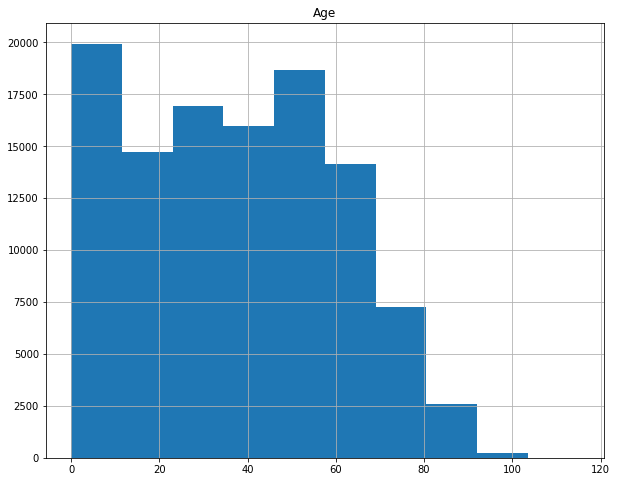

In [22]:
df.hist(figsize =(10, 8));

The general overview of the histogram chart shows that most patients do not suffer from a disease

In [23]:
# here we are creating a function to calculate the proportion of a single variable
def PropByVar(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(8,10), autopct='%1.1f%%', fontsize = 14);
    ax.set_title(variable + " " + '(%) (Per Appointment)', fontsize = 18);
    return np.round(df_pie/df.shape[0]*100, 2)                                           


In [24]:
# creating a function to generate a barplot  on the frequency of 2 or more variables
def Show_No_Show_bar_plot(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.No_show, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(stacked = False, figsize=(10,10));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 45, fontsize = 16);
    ax.set_title('ShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 16)
    ax.set_ylabel('(%)', fontsize = 16)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 16)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2,
                str(height)+'%',
                ha='center',
                va='bottom',
                fontsize = 16)
    return df_by_Group

In [25]:
# Creating a list of the top 10 neigbourhoods with the highest amount of appointment
listof_top_10Nbrhd = list(df['Neighbourhood'].value_counts().nlargest(10).index)

#dataframe for the top 10 neigbourhoods
df_top_10Nbrhd = df[df['Neighbourhood'].isin(listof_top_10Nbrhd)]

#filtering the Noshow record by neighbourhood
df_top_10Nbrhd_NoShow = df_top_10Nbrhd[df_top_10Nbrhd['No_show']=='Absent']

## Research Question 1 What is the Propotion of show-up vs No-show-up

Present    79.81
Absent     20.19
Name: No_show, dtype: float64

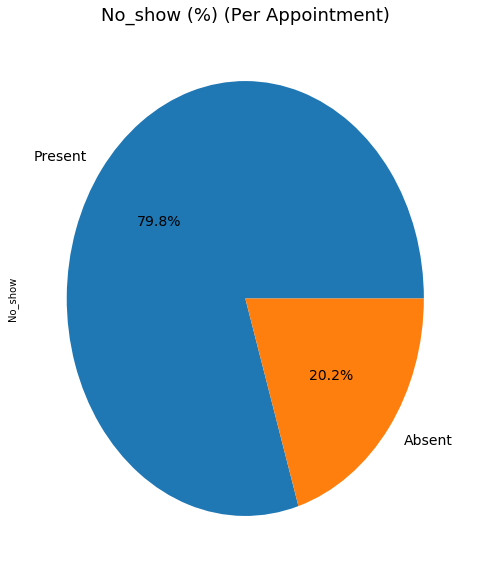

In [26]:
PropByVar(df, 'No_show')

From the chart above, it can be seen the show-up rate is 79.8% while the No_show is 20.2%.

### Research Question 2: What is the proportion of ShowUp vs No ShowUp by Gender

No_show,Absent,Present
Gender,,
F,20.31,79.69
M,19.97,80.03


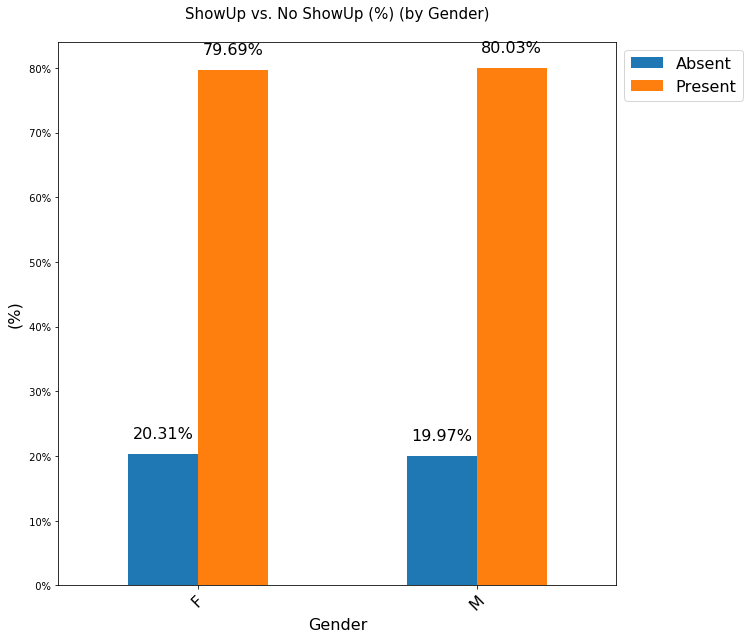

In [27]:
Show_No_Show_bar_plot(df, 'Gender')

The Show-up rate is slightly higher for males patients (80.03%) than females patients (79.69%) while the No_Show rate is slightly higher for female patients (20.31%) than male patients (19.97%)

### Research Question 3: What is the (%) of the Top Ten Neighbourhood with the highest appointment

JARDIM CAMBURI       19.02
MARIA ORTIZ          14.31
RESISTÊNCIA          10.92
JARDIM DA PENHA       9.56
ITARARÉ               8.66
CENTRO                8.22
TABUAZEIRO            7.72
SANTA MARTHA          7.72
JESUS DE NAZARETH     7.03
BONFIM                6.84
Name: Neighbourhood, dtype: float64

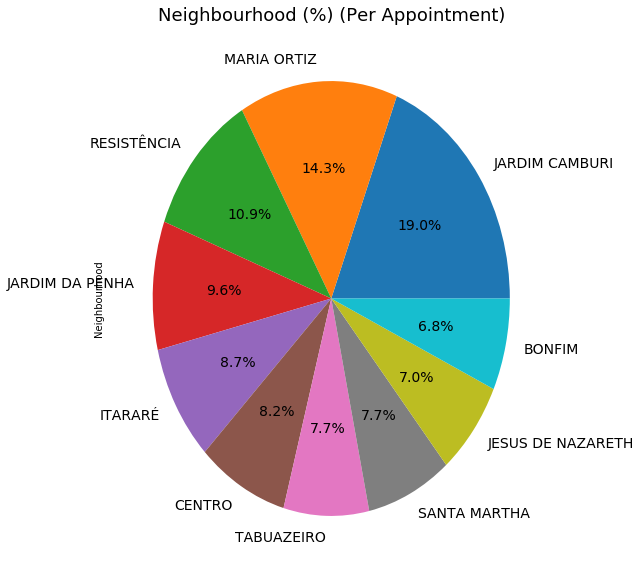

In [28]:
PropByVar(df_top_10Nbrhd, 'Neighbourhood')

From the chart above, JARDIM CAMBURI have the largest proportion of appointment (19.02%) while BONFIM had the least appointment (6.84%) amongst the top 10 Neighbourhood. 

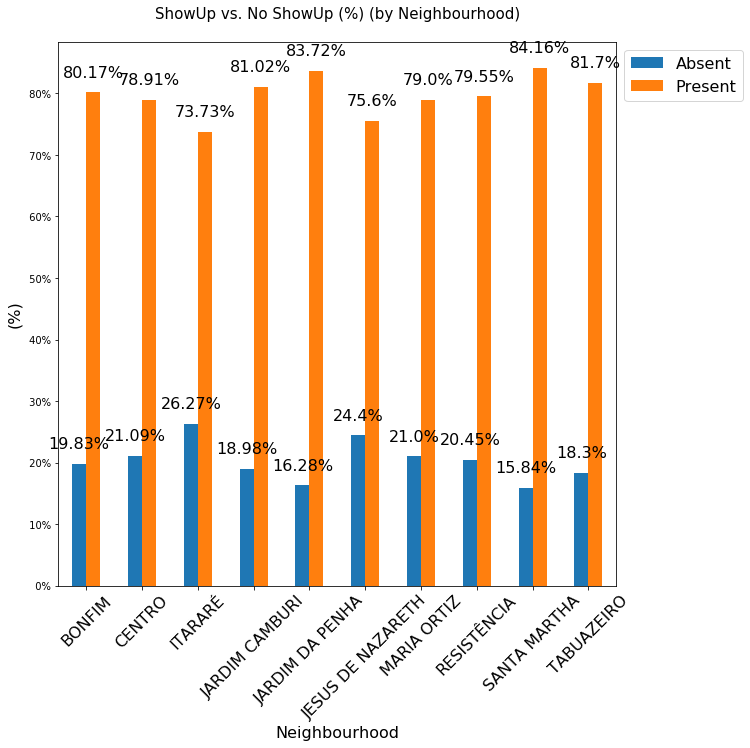

In [29]:
# show-up rate of the  10 top neigbourbood 
showuprate_top10Nbrhd = Show_No_Show_bar_plot(df_top_10Nbrhd,'Neighbourhood')

The Show-up rate of SANTA MARTHA (per no. of appointments) is the highest with 84.16%, where the show-up rate of ITARARÉ is the lowest with 73.73% while the highest rate of No-Show rate is recorded in ITARARÉ with 26.27% and the lowest No-Show rate was recorded in SANTA MARTHA with 15.84%

### Research Question 4: Which day are the most appointment made?

Wednesday    23.40
Tuesday      23.20
Monday       20.55
Friday       17.21
Thursday     15.60
Saturday      0.04
Name: weekday, dtype: float64

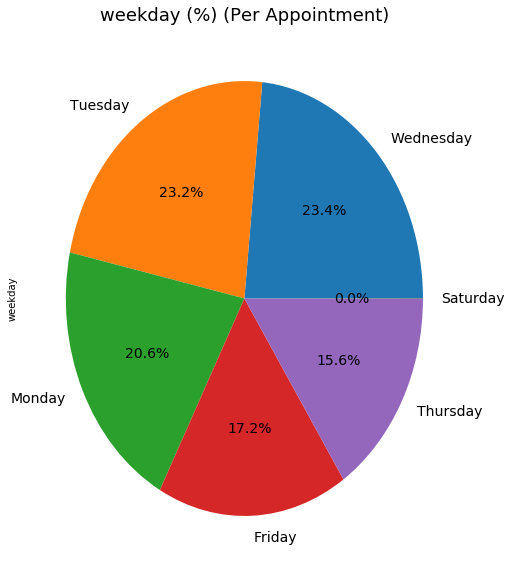

In [30]:
PropByVar(df, 'weekday')

From the chart above, patients were scheduled most on Wednesday with 23.4% while the least appointment day was on Saturday with 0.04%

### Research Question 5: What day of the week has the highest and lowest show-up and No-Show?

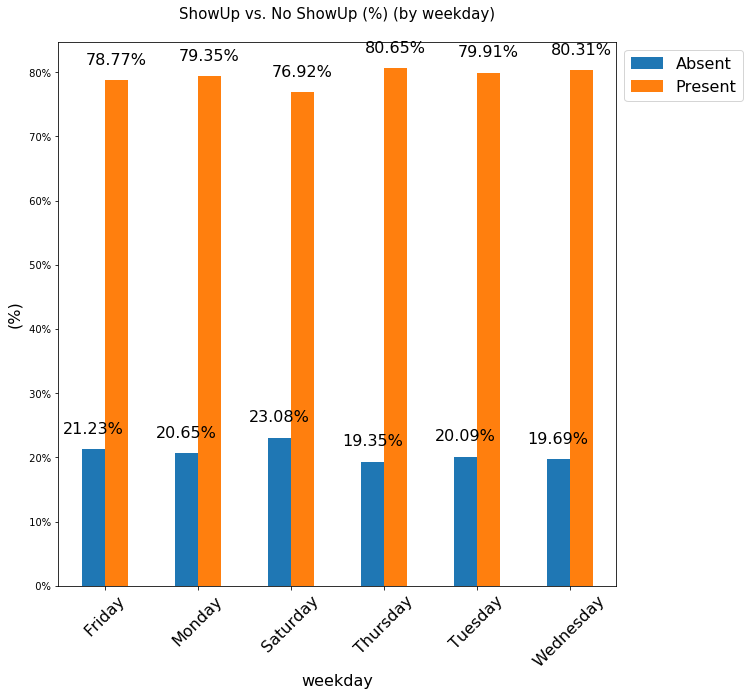

In [31]:
weekday_showup = Show_No_Show_bar_plot(df, 'weekday')

It can be seen from the chart above that patients who have their appointments on Thursday have the highest show-up rate of 80.65% (higher than the average show-up rate), while patients who have their appointments on Saturday have the highest No-show rate of 23.08%.

<a id='conclusions'></a>
## Conclusions
Findings:
1) The show-up rate is 79.8% while the No_show is 20.2%.


2) The Show-up rate is slightly higher for males patients (80.03%) than females patients (79.69%) while the No_Show rate is slightly higher for female patients (20.31%) than male patients (19.97%).


3) JARDIM CAMBURI have the largest proportion of appointment (19.02%) while BONFIM had the least appointment (6.84%) amongst the top 10 Neighbourhood.


4) The Show-up rate of SANTA MARTHA (per no. of appointments) is the highest with 84.16%, where the show-up rate of ITARARÉ is the lowest with 73.73% while the highest rate of No-Show rate is recorded in ITARARÉ with 26.27% and the lowest No-Show rate was recorded in SANTA MARTHA with 15.84%.


5) Patients were scheduled most on Wednesday with 23.4% while the least appointment day was on Saturday with 0.04%.


6) Patients who have their appointments on Thursday have the highest show-up rate of 80.65% (higher than the average show-up rate), while patients who have their appointments on Saturday have the highest No-show rate of 23.08%.

## Limitations
It was not possible to carry out a scatter plot to show relationship/correlation between several variable because most of the columns were catergorical data.


In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0